In [90]:
import pandas as pd
import numpy as np
%precision 3
 

'%.3f'

In [91]:
df = pd.read_csv('../stat_analysis/data/ch2_scores_em.csv', index_col= 'student number') #판다스로 경로에 있는 파일을 읽고 index를 student로 지정함
df.head()
scores = np.array(df['english'])[:10] # df의 영어 열만 추출해서 scores라는 배열 만듦

In [92]:
pd.Series(scores).mode() # scores에서 가장 자주 나온 값 출력 pd.scores(배열).mode()
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [93]:
scores_df = pd.DataFrame({'score':scores}, index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name = 'student'))
scores_df #판다스의 데이터 프레임으로 다시 표를 짬 score의 열은 scores로 인덱스는 a~j까지 인덱스의 이름은 학생

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [94]:
sorted_scores = np.sort(scores) #np의 sort로 scores를 정렬
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [95]:
avg = np.sum(scores) / len(scores)
avg #scores의 평균

55.000

In [96]:
n = len(sorted_scores)
if n % 2 == 0:
    m1 = sorted_scores[n//2] # 중간의 오른쪽 값
    m2 = sorted_scores[n//2 - 1] # 중간의 왼쪽 값
    median = (m1 + m2) / 2

else:
    median = sorted_scores[(n + 1) // 2 - 1]
median

56.500

In [97]:
mean = np.mean(scores) # scores의 평균을 구하는 함수
mean
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [98]:
ano_scores = [50, 60, 58, 54, 51, 56, 57, 37, 69, 53]
ano_mean = np.mean(ano_scores)
ano_deviation = ano_scores - ano_mean
ano_deviation

array([ -4.5,   5.5,   3.5,  -0.5,  -3.5,   1.5,   2.5, -17.5,  14.5,
        -1.5])

In [99]:
summary_df = scores_df.copy() # summary에 scores표 복사
summary_df['deviation'] = deviation #deviation이라는 열 추가 후 deviation으로 내용 채움
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [100]:
np.mean(deviation**2) #scores의 편차를 제곱한 후 평균을 구하여 분산 출력
np.var(scores) #variance의 줄임말인 var로 바로 scores의 분산 출력

86.000

In [101]:
summary_df['square of deviation'] = deviation**2 #또는 np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [102]:
np.mean(summary_df) #이러면 모든 값을 한 번에 평균냄
summary_df.mean() #이건 각 열을 구분하여 평균

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [103]:
np.sqrt(np.var(scores, ddof=0)) # scores의 분산에 루트를 씌워 표준편차 출력 ddof = 0은 표준 분산
np.std(scores, ddof = 0) # standard deviation의 약자인 std를 이용해 scores의 표준편차 바로 출력

9.274

In [104]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [105]:
pd.Series(scores).describe() #지금까지 구한 지표들을 한 번에 알려주는 pandas 함수

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [106]:
z = (scores - np.mean(scores)) / np.std(scores) #scores의 표준화
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [107]:
z = 50 - 10 * z # scores의 표준화 값을 편찻값으로 만듦
z

array([64.018, 34.903, 48.922, 65.097, 47.843, 57.548, 39.217, 56.47 ,
       39.217, 46.765])

In [108]:
scores_df['deviation value'] = z #표에 편찻값 추가
scores_df

,score,deviation value
student,,
A,42,64.018261
B,69,34.903412
C,56,48.921672
D,41,65.096588
E,57,47.843345
F,48,57.548294
G,65,39.216723
H,49,56.469966
I,65,39.216723


In [109]:
english_scores = np.array(df['english']) #english라는 항목을 제한 없이 array로 만듦
pd.Series(english_scores).describe() #english_scores의 지표 출력

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [110]:
freq, _ = np.histogram(english_scores, bins = 10, range =(0, 100)) #p.histogram으로 도수분포표 작성 bins로 계급수를 10으로 설정 range로 범위를 0~100으로 설정
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [111]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)] #문자열 리스트 작성 0-100까지 10으로 끊어서
freq_dist_df = pd.DataFrame({'frequency':freq}, index = pd.Index(freq_class, name = 'class')) 
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [112]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)] #문자열이 아니므로 f'없음
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [113]:
rel_freq = freq / freq.sum() #상대도수 만들기
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [114]:
cum_rel_freq = np.cumsum(rel_freq) #cumsum 누적하는 함수
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [115]:
freq_dist_df['relative frequency'] = rel_freq #계급값 추가
freq_dist_df['class value'] = class_value #상대도수 추가
freq_dist_df['cumulative relative frequency'] = cum_rel_freq #누적상대도수 추가
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
#열 이름 순서 배정
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [116]:
freq_dist_df.loc[freq_dist_df[ 'frequency' ].idxmax(), 'class value'] #도수분포표에서 frequncy열에서 가장 많은 행의 class value 값을 출력


np.int64(65)

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline 
#(위는 파이썬 문법이 아니라 주석을 밑에다 달아야함)주피터노트북 터미널에서 보이게하는 함수

In [118]:
fig = plt.figure(figsize=(10, 6)) #캔버스 위에 그래프를 그릴 영역 지정
ax = fig.add_subplot(111) #영역을 1x1로 하나의 영역에 그린다는 의미
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100)) #계급수를 10개로 범위는 0-100인 히스토그램을 freq에 저장 계급과 막대 그래프는 반환 받지 않음

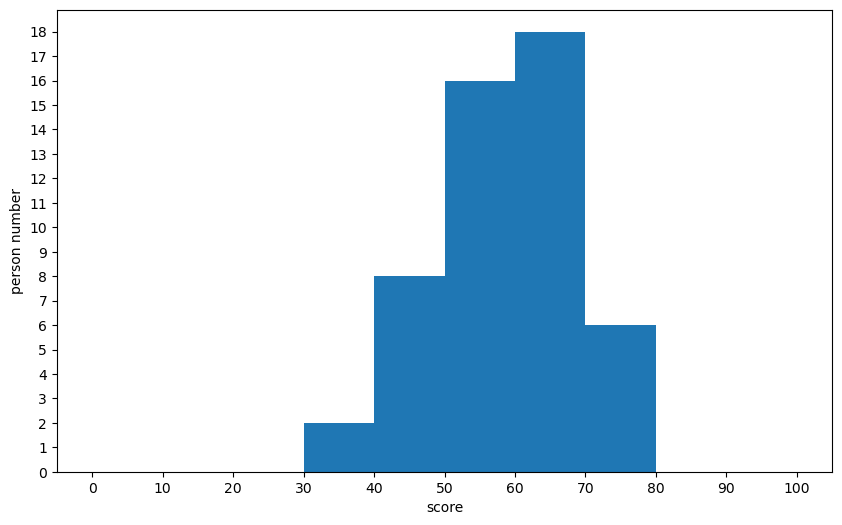

In [119]:
ax.set_xlabel('score') # x축 이름 score로 설정
ax.set_ylabel('person number') #y축 이름 person number로 설정
ax.set_xticks(np.linspace(0, 100, 10+1)) #x축 0부터 100사이에 10+1개의 점 생성 10+1은 계급수와 관련짓기 위함
ax.set_yticks(np.arange(0, freq.max() + 1)) #0부터 freq의 최댓값까지 점 설정
plt.show()


In [129]:
fig = plt.figure(figsize=(10,6)) #영역 설정
ax = fig.add_subplot(111) #1x1에 1씩 채움
freq, _, _ = ax.hist(english_scores, bins = 25, range=(0,100)) #이번엔 계급수를 0-100범위에서 25개로 나눔
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25 + 1))
ax.set_yticks(np.arange(0, freq.max() + 1))

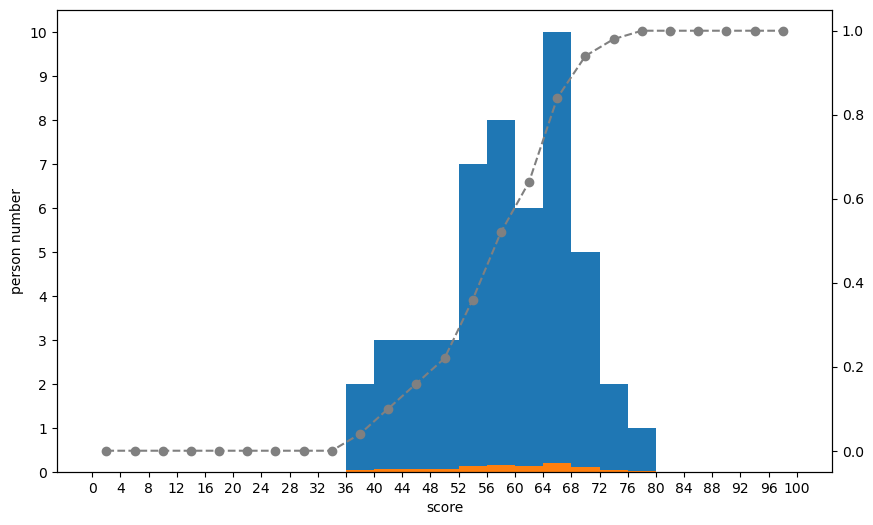

In [130]:
ax2 = ax.twinx() #y축이 다른 ax2그래프를 ax1그래프 영역에 그림
weights = np.ones_like(english_scores) / len(english_scores) # 상대도수
rel_freq, _, _ = ax.hist(english_scores, bins = 25, range = (0, 100), weights = weights) #도수의 단위를 상대도수로 정함
cum_rel_freq = np.cumsum(rel_freq) #누적 상대도수
class_value = [(i+(i+4)) // 2 for i in range(0, 100, 4)] #계급값
ax2.plot(class_value, cum_rel_freq, ls ='--', marker ='o', color = 'gray') #x좌표를 계급값 y좌표를 누적상대도수로 한 '--' 점선에 'o' 좌표마다 점 색은 회색인 그래프 생성
ax2.grid(visible=False)
plt.show()